## Climate Change - Grand Marais, MN - Lake Superior

Wrangle data for Grand Marais, MN weather station (USC00213282) on Lake Superior shoreline as a land-based proxy for air temperatures near Lake Superior. 

Citation: Menne, M. J., Durre, I., Korzeniewski, B., McNeill, S., Thomas, K., Yin, X., Anthony, S., Ray, R., Vose, R. S., Gleason, B. E., & Houston, T. G. (2012). Global Historical Climatology Network – Daily (GHCN-Daily), Version 3: Grand Marais, MN (USC00213282), 1901–2025. NOAA National Centers for Environmental Information. https://doi.org/10.7289/V5D21VHZ
[Accessed October 4, 2025]

In [2]:
# Import libraries
import earthpy # Manage local data
import pandas as pd #Work with tabular data

In [3]:
# Restore variables from downloading data
%store -r grand_marais_raw_climate_df
%store -r grand_marais_ncei_url

In [4]:
# Get information on raw data frame
grand_marais_raw_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35921 entries, 1920-03-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  35921 non-null  object 
 1   TOBS     34283 non-null  float64
dtypes: float64(1), object(1)
memory usage: 841.9+ KB


In [5]:
# Check that data was imported into a pandas DataFrame
type(grand_marais_raw_climate_df)

pandas.core.frame.DataFrame

In [6]:
# Retrieve temperature column only
grand_marais_climate_df = grand_marais_raw_climate_df[["TOBS"]]

# Call data frame with only temp
grand_marais_climate_df

,TOBS
DATE,
1920-03-01,NaN
1920-03-02,16.0
1920-03-03,25.0
1920-03-04,10.0
1920-03-05,12.0
...,...
2020-12-27,17.0
2020-12-28,15.0
2020-12-29,2.0


In [7]:
# Store variables 
%store grand_marais_climate_df grand_marais_raw_climate_df

Stored 'grand_marais_climate_df' (DataFrame)
Stored 'grand_marais_raw_climate_df' (DataFrame)


### Convert units for Grand Marais, MN dataset (proxy for Lake Superior)

In [8]:
# Restore variables from wrangling data section
%store -r grand_marais_climate_df
%store -r grand_marais_raw_climate_df

In [9]:
# Rename temp column with units in fahrenheit
grand_marais_climate_df_units = grand_marais_climate_df.rename(columns={
    'TOBS': 'temp_f',
})

# Call data frame with renamed column with f units
grand_marais_climate_df_units

,temp_f
DATE,
1920-03-01,NaN
1920-03-02,16.0
1920-03-03,25.0
1920-03-04,10.0
1920-03-05,12.0
...,...
2020-12-27,17.0
2020-12-28,15.0
2020-12-29,2.0


In [10]:
# Convert original data frame from farenheight to celsius
grand_marais_climate_df_units['temp_c'] = ((grand_marais_climate_df_units['temp_f']-32)*(5/9))

# Call new data frame with both unit columns
grand_marais_climate_df_units

,temp_f,temp_c
DATE,,
1920-03-01,NaN,NaN
1920-03-02,16.0,-8.888889
1920-03-03,25.0,-3.888889
1920-03-04,10.0,-12.222222
1920-03-05,12.0,-11.111111
...,...,...
2020-12-27,17.0,-8.333333
2020-12-28,15.0,-9.444444
2020-12-29,2.0,-16.666667


In [11]:
# Convert units with a function
def convert(temp_f):
    """Convert Fahrenheit temperature to Celsius"""
    return (temp_f- 32) *(5/9) 

# Naming the celsius conversion column
grand_marais_climate_df_units['temp_c'] = (
    grand_marais_climate_df_units['temp_f'].apply(convert))

# Call converted units table
grand_marais_climate_df_units

,temp_f,temp_c
DATE,,
1920-03-01,NaN,NaN
1920-03-02,16.0,-8.888889
1920-03-03,25.0,-3.888889
1920-03-04,10.0,-12.222222
1920-03-05,12.0,-11.111111
...,...,...
2020-12-27,17.0,-8.333333
2020-12-28,15.0,-9.444444
2020-12-29,2.0,-16.666667


In [12]:
# Store data frame units for future use
%store grand_marais_climate_df_units 

Stored 'grand_marais_climate_df_units' (DataFrame)


### Plot results 

In [13]:
%store -r grand_marais_climate_df_units

In [14]:
# Import packages
import holoviews as hv
import hvplot.pandas

<Axes: xlabel='DATE'>

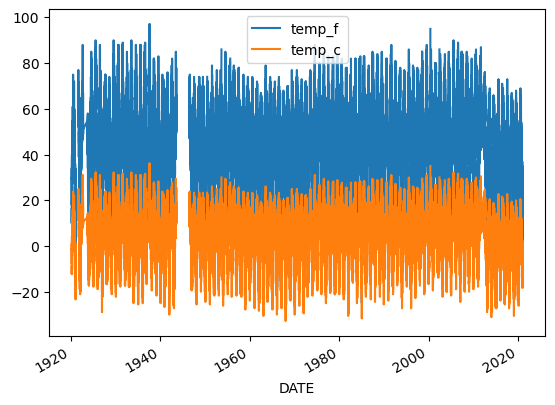

In [15]:
# Plot grand marais temperature data frame 
grand_marais_climate_df_units.plot()

<Axes: title={'center': 'Climate Temperature Data in Grand Marais, MN (Lake Superior Shoreline) [1920-2020]'}, xlabel='Year', ylabel='Temperature ($^\\circ$C) '>

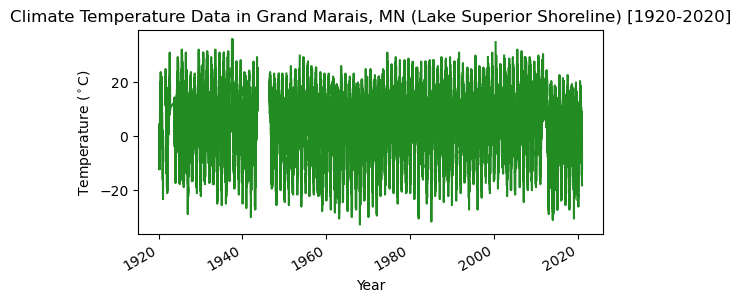

In [16]:
# Plot the data using .plot
grand_marais_climate_df_units.plot(
    y='temp_c',
    title='Climate Temperature Data in Grand Marais, MN (Lake Superior Shoreline) [1920-2020]',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C) ',
    legend=False,
    color='forestgreen',
    figsize= (6, 3))


In [17]:
# Clean plot by using average annual temp
grand_marais_ann_temp_df = (
   grand_marais_climate_df_units
   # Date time set to start of year
   .resample('YS') 
   # Calculate annual average of temperature data
   .mean() 
)

# Call annual temperature data frame
grand_marais_ann_temp_df

,temp_f,temp_c
DATE,,
1920-01-01,44.000000,6.666667
1921-01-01,39.071429,3.928571
1922-01-01,41.863469,5.479705
1923-01-01,39.141304,3.967391
1924-01-01,41.444751,5.247084
...,...,...
2016-01-01,38.068493,3.371385
2017-01-01,36.006006,2.225559
2018-01-01,34.049315,1.138508


<Axes: title={'center': 'Climate Temperature Data in Grand Marais, MN (Lake Superior Shoreline) [1920-2020]'}, xlabel='Year', ylabel='Temperature ($^\\circ$C)'>

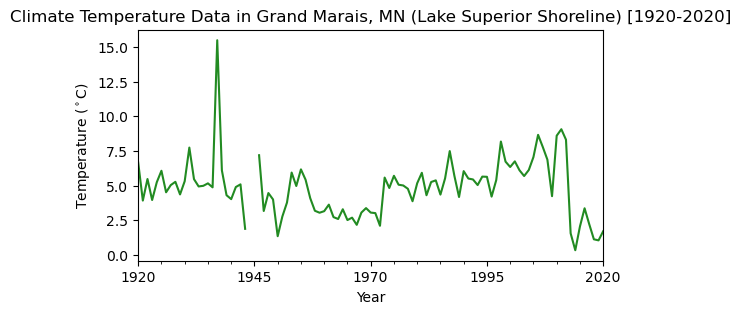

In [18]:
# Plot the annual data
grand_marais_ann_temp_df.plot(
    y='temp_c',
    title='Climate Temperature Data in Grand Marais, MN (Lake Superior Shoreline) [1920-2020]',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)',
    legend=False,
    color='forestgreen',
    figsize=(6, 3))

In [19]:
# Plot the annual data interactively
grand_marais_ann_temp_plot = grand_marais_ann_temp_df.hvplot(
    y='temp_c',
    title='Climate Temperature Data in Grand Marais, MN (Lake Superior Shoreline) [1920-2020]',
    xlabel='Year',
    ylabel='Temperature (°C)',
    legend=False,
    color='forestgreen',
    width=1000,
    height=500)

#Call the interactive temperature plot 
grand_marais_ann_temp_plot

:Curve   [DATE]   (temp_c)

In [20]:
# Save plot as html
hv.save(grand_marais_ann_temp_plot, 'grand_marais_ann_temp_plot.html')

In [21]:
# Store variables for future use
%store grand_marais_ann_temp_plot grand_marais_ann_temp_df

Stored 'grand_marais_ann_temp_plot' (Curve)
Stored 'grand_marais_ann_temp_df' (DataFrame)


### Linear Regression Analysis & Changing Climate

In [22]:
%store -r grand_marais_ann_temp_df

In [23]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt

# Common statistical plots for tabular data
import seaborn as sns

# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

# Import pandas for index
import pandas as pd


In [24]:
grand_marais_ann_temp_df.index.year.values

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int32)

In [25]:
### This code was created with the help of ChatGPT ###
# Drop rows where 'temp_c' is NaN
grand_marais_temp_clean = grand_marais_ann_temp_df.dropna(subset=['temp_c'])

# Getting the data in the correct format for scikit-learn
X = (
    grand_marais_temp_clean
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    #Reshape 'date' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = grand_marais_temp_clean['temp_c'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.001456158897980084
Intercept: 7.709545855066807


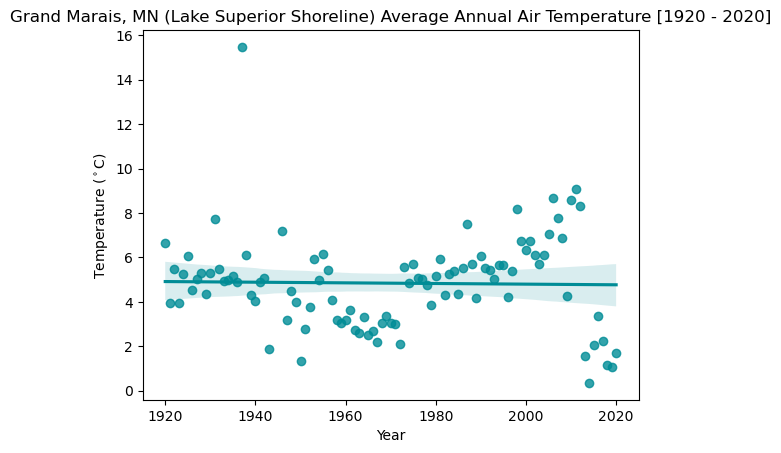

In [27]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=grand_marais_ann_temp_df.index.year, 
    y=grand_marais_ann_temp_df.temp_c,
    color='#008C96',
)
# Set plot labels
ax.set(
    title='Grand Marais, MN (Lake Superior Shoreline) Average Annual Air Temperature [1920 - 2020]',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)
# Display the plot without extra text
plt.show()